In [1]:
import numpy as np
import os
import pandas as pd
from typing import Union, List, Callable, Optional, Tuple, Dict
import abc
import time
import seaborn as sn
from matplotlib import pyplot as plt

In [2]:
dl = pd.read_pickle("Titparea.pickle")

In [3]:
df = dl.X
label = dl.y
df['SepsisLabel'] = label
cols_list = df.columns.to_list()
cols_list

['HR_maxNf',
 'O2Sat_maxNf',
 'Temp_maxNf',
 'SBP_maxNf',
 'MAP_maxNf',
 'DBP_maxNf',
 'Resp_maxNf',
 'EtCO2_maxNf',
 'BaseExcess_maxNf',
 'HCO3_maxNf',
 'FiO2_maxNf',
 'pH_maxNf',
 'PaCO2_maxNf',
 'SaO2_maxNf',
 'AST_maxNf',
 'BUN_maxNf',
 'Alkalinephos_maxNf',
 'Calcium_maxNf',
 'Chloride_maxNf',
 'Creatinine_maxNf',
 'Bilirubin_direct_maxNf',
 'Glucose_maxNf',
 'Lactate_maxNf',
 'Magnesium_maxNf',
 'Phosphate_maxNf',
 'Potassium_maxNf',
 'Bilirubin_total_maxNf',
 'TroponinI_maxNf',
 'Hct_maxNf',
 'Hgb_maxNf',
 'PTT_maxNf',
 'WBC_maxNf',
 'Fibrinogen_maxNf',
 'Platelets_maxNf',
 'Age_maxNf',
 'Gender_maxNf',
 'HospAdmTime_maxNf',
 'ICULOS_maxNf',
 'Unit1_maxNf',
 'Unit2_maxNf',
 'HR_minNf',
 'O2Sat_minNf',
 'Temp_minNf',
 'SBP_minNf',
 'MAP_minNf',
 'DBP_minNf',
 'Resp_minNf',
 'EtCO2_minNf',
 'BaseExcess_minNf',
 'HCO3_minNf',
 'FiO2_minNf',
 'pH_minNf',
 'PaCO2_minNf',
 'SaO2_minNf',
 'AST_minNf',
 'BUN_minNf',
 'Alkalinephos_minNf',
 'Calcium_minNf',
 'Chloride_minNf',
 'Creatinin

In [4]:
len(cols_list)

245

In [5]:
cnf_cols = ['HR_cnf',
 'O2Sat_cnf',
 'Temp_cnf',
 'SBP_cnf',
 'MAP_cnf',
 'DBP_cnf',
 'Resp_cnf',
 'EtCO2_cnf',
 'BaseExcess_cnf',
 'HCO3_cnf',
 'FiO2_cnf',
 'pH_cnf',
 'PaCO2_cnf',
 'SaO2_cnf',
 'AST_cnf',
 'BUN_cnf',
 'Alkalinephos_cnf',
 'Calcium_cnf',
 'Chloride_cnf',
 'Creatinine_cnf',
 'Bilirubin_direct_cnf',
 'Glucose_cnf',
 'Lactate_cnf',
 'Magnesium_cnf',
 'Phosphate_cnf',
 'Potassium_cnf',
 'Bilirubin_total_cnf',
 'TroponinI_cnf',
 'Hct_cnf',
 'Hgb_cnf',
 'PTT_cnf',
 'WBC_cnf',
 'Fibrinogen_cnf',
 'Platelets_cnf',
 'Age_cnf',
 'Gender_cnf',
 'HospAdmTime_cnf',
 'ICULOS_cnf',
 'Unit1_cnf',
 'Unit2_cnf']

In [25]:
df_len = len(df)
df_len

20000

In [7]:
# cnf_dict = {}
# for col in cols_list:
#   cnf_dict[col] = 
#   #sum for pd col and enter to dict {col name: num of missing values}

In [28]:
# counting missing value for every cnf column
cnf_sum_df = df[cnf_cols].sum(axis=0)
cnf_prec_df = (cnf_sum_df/df_len).round(2)
cnf_sum_df

HR_cnf                   75124
O2Sat_cnf                99034
Temp_cnf                498868
SBP_cnf                 111038
MAP_cnf                  94738
DBP_cnf                 235672
Resp_cnf                116701
EtCO2_cnf               728700
BaseExcess_cnf          714001
HCO3_cnf                723737
FiO2_cnf                693249
pH_cnf                  702705
PaCO2_cnf               713216
SaO2_cnf                728760
AST_cnf                 742970
BUN_cnf                 703383
Alkalinephos_cnf        743096
Calcium_cnf             710957
Chloride_cnf            721044
Creatinine_cnf          709158
Bilirubin_direct_cnf    753423
Glucose_cnf             625368
Lactate_cnf             735127
Magnesium_cnf           707622
Phosphate_cnf           725052
Potassium_cnf           684809
Bilirubin_total_cnf     743886
TroponinI_cnf           747540
Hct_cnf                 688080
Hgb_cnf                 699294
PTT_cnf                 733039
WBC_cnf                 706790
Fibrinog

In [9]:
fnf_cols = ['HR_fnf',
 'O2Sat_fnf',
 'Temp_fnf',
 'SBP_fnf',
 'MAP_fnf',
 'DBP_fnf',
 'Resp_fnf',
 'EtCO2_fnf',
 'BaseExcess_fnf',
 'HCO3_fnf',
 'FiO2_fnf',
 'pH_fnf',
 'PaCO2_fnf',
 'SaO2_fnf',
 'AST_fnf',
 'BUN_fnf',
 'Alkalinephos_fnf',
 'Calcium_fnf',
 'Chloride_fnf',
 'Creatinine_fnf',
 'Bilirubin_direct_fnf',
 'Glucose_fnf',
 'Lactate_fnf',
 'Magnesium_fnf',
 'Phosphate_fnf',
 'Potassium_fnf',
 'Bilirubin_total_fnf',
 'TroponinI_fnf',
 'Hct_fnf',
 'Hgb_fnf',
 'PTT_fnf',
 'WBC_fnf',
 'Fibrinogen_fnf',
 'Platelets_fnf',
 'Age_fnf',
 'Gender_fnf',
 'HospAdmTime_fnf',
 'ICULOS_fnf',
 'Unit1_fnf',
 'Unit2_fnf']

In [10]:
len(fnf_cols)

40

In [12]:
# cols_list - fnf_cols - cnf_cols
sub_list = [col for col in cols_list if col not in fnf_cols+cnf_cols]
mean_cols_list = ['HR_meanNf',
 'O2Sat_meanNf',
 'Temp_meanNf',
 'SBP_meanNf',
 'MAP_meanNf',
 'DBP_meanNf',
 'Resp_meanNf',
 'EtCO2_meanNf',
 'BaseExcess_meanNf',
 'HCO3_meanNf',
 'FiO2_meanNf',
 'pH_meanNf',
 'PaCO2_meanNf',
 'SaO2_meanNf',
 'AST_meanNf',
 'BUN_meanNf',
 'Alkalinephos_meanNf',
 'Calcium_meanNf',
 'Chloride_meanNf',
 'Creatinine_meanNf',
 'Bilirubin_direct_meanNf',
 'Glucose_meanNf',
 'Lactate_meanNf',
 'Magnesium_meanNf',
 'Phosphate_meanNf',
 'Potassium_meanNf',
 'Bilirubin_total_meanNf',
 'TroponinI_meanNf',
 'Hct_meanNf',
 'Hgb_meanNf',
 'PTT_meanNf',
 'WBC_meanNf',
 'Fibrinogen_meanNf',
 'Platelets_meanNf',
 'Age_meanNf',
 'Gender_meanNf',
 'HospAdmTime_meanNf',
 'ICULOS_meanNf',
 'Unit1_meanNf',
 'Unit2_meanNf']

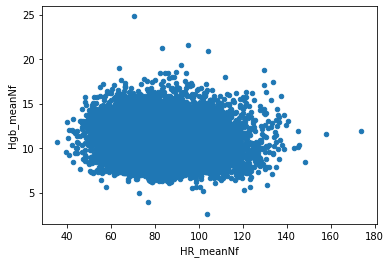

In [13]:

df.plot.scatter(x="HR_meanNf", y="Hgb_meanNf")
plt.show()

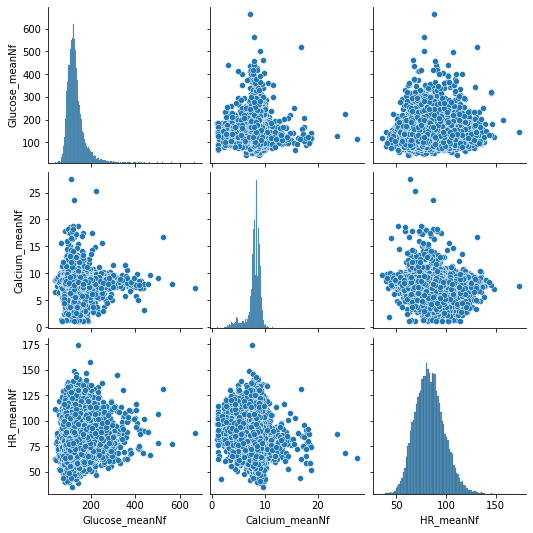

In [14]:
sn.pairplot(data = df, vars=['Glucose_meanNf','Calcium_meanNf','HR_meanNf'])
plt.show()

In [15]:
sepsis = df[(df["SepsisLabel"] != 0)]
no_sepsis = df[(df["SepsisLabel"] == 0)]

In [16]:
# Creating a matrix using age, salry, balance as rows and columns
df[['HR_meanNf','Hgb_meanNf','Calcium_meanNf']].corr()


,HR_meanNf,Hgb_meanNf,Calcium_meanNf
HR_meanNf,1.000000,-0.125161,-0.137416
Hgb_meanNf,-0.125161,1.000000,0.250036
Calcium_meanNf,-0.137416,0.250036,1.000000


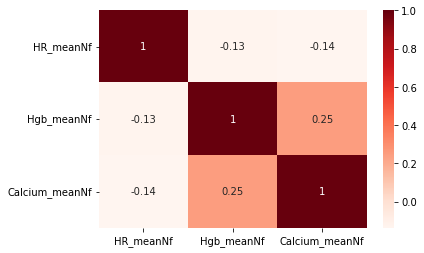

In [17]:
#plot the correlation matrix of salary, balance and age in data dataframe.
sn.heatmap(df[['HR_meanNf','Hgb_meanNf','Calcium_meanNf']].corr(), annot=True, cmap = 'Reds')
plt.show()

**Wilcoxon Test**

We would like to test if the average of heart rate in helathy population is (stochastically) less than the average of heart rate in sick population:<br>
$H_0:\ HR_H =HR_S$<br>
$H_1:\ HR_H \prec HR_S $<br>

In [19]:
from scipy.stats import ranksums
HR_healthy = no_sepsis['HR_meanNf']
HR_sick = sepsis['HR_meanNf']
ranksums(HR_healthy, HR_sick, alternative='less')

RanksumsResult(statistic=-18.09551757438908, pvalue=1.7284065299059705e-73)

We get that our p-value is less than α=0.05 so we will reject the null hypothesis, and we can say that in statistical significance of 0.05 the distribution of average of heart rate in helathy population is (stochastically) less than the average of heart rate in sick population.